In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
ATAC = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";")
ATAC.head ()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,23377.00,...,45839.00,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,45879.00,1.0,NaN,NaN,13181.00,0.10,...,0.87,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,45691.00,1.0,NaN,NaN,0.41,0.10,...,0.44,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,11324.00,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00


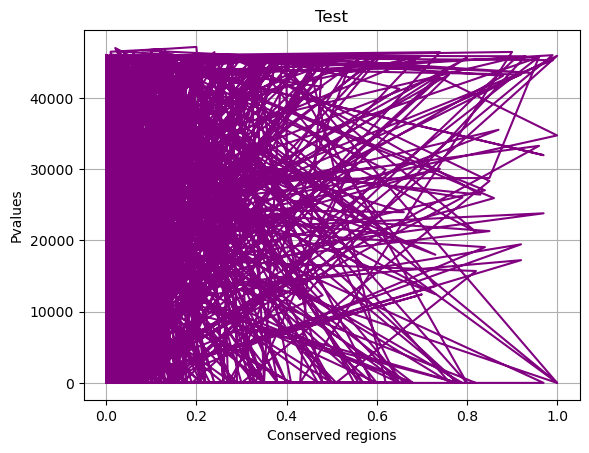

In [27]:
import pandas as pd
df = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";")

n = min(1000, len(df))
df_sampled = df.sample(n=n, random_state=42)

plt.plot(df_sampled["mm10.60way.phastCons_scores"], df_sampled["_-log10_bestPvalue"], c= "purple")
plt.xlabel("Conserved regions")
plt.ylabel("Pvalues")
plt.title("Test")
plt.grid(True)
plt.show()

In [ ]:
QC_Metrics = pd.read_csv("data/ATAC_QCmatric.CSV", sep=";")
QC_Metrics.head()

df_sampled.dtypes

,SampleName,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
0,LTHSC.34-.BM#1,LTHSC.34-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34-,677,22287984,"4,58",2470102,"10,6",NaN
1,LTHSC.34+.BM#1,LTHSC.34+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34+,2483,28588536,"3,17",7675501,"7,7",NaN
2,STHSC.150-.BM#1,STHSC.150-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150-CD48-,3660,22170346,"3,25",6060045,"11,13",NaN
3,MPP4.135+.BM#1,MPP4.135+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135+,10000,24003590,"13,83",6128252,"18,96",NaN
4,proB.CLP.BM#1,proB.CLP.BM,Hardy,B,B Cell,Bone Marrow,CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...,10000,23578208,"7,67",6588564,"13,21","0,868"


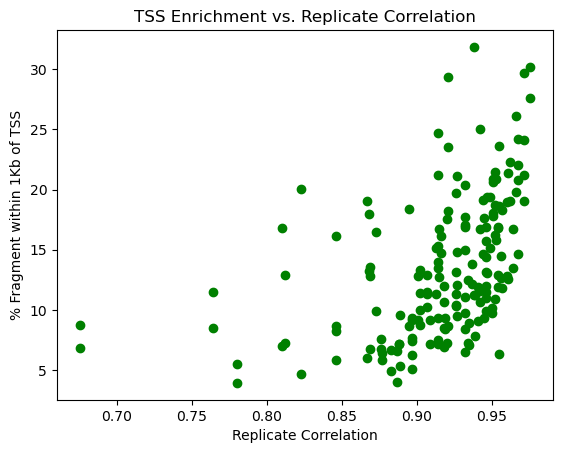

In [41]:
import pandas as pd
df = pd.read_csv("data/ATAC_QCmatric.CSV", sep=";")

df["%fragment.1Kb_TSS"] = df["%fragment.1Kb_TSS"].str.replace("%", "", regex=False).str.replace(",", ".")
df["Replicate.cor"] = df["Replicate.cor"].str.replace(",", ".")

df["%fragment.1Kb_TSS"] = pd.to_numeric(df["%fragment.1Kb_TSS"], errors="coerce")
df["Replicate.cor"] = pd.to_numeric(df["Replicate.cor"], errors="coerce")

n = min(1000, len(df))
df_sampled = df.sample(n=n, random_state=42)

plt.scatter(df_sampled["Replicate.cor"], df_sampled["%fragment.1Kb_TSS"], color="green")
plt.xlabel("Replicate Correlation")
plt.ylabel("% Fragment within 1Kb of TSS")
plt.title("TSS Enrichment vs. Replicate Correlation")
plt.show()

In [ ]:
RNASeq = pd.read_csv("data/2.RNA-Seq data.CSV", sep=";")
RNASeq.head()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0610005C13Rik,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,0610007P14Rik,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,0610009B22Rik,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,0610009L18Rik,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,0610009O20Rik,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


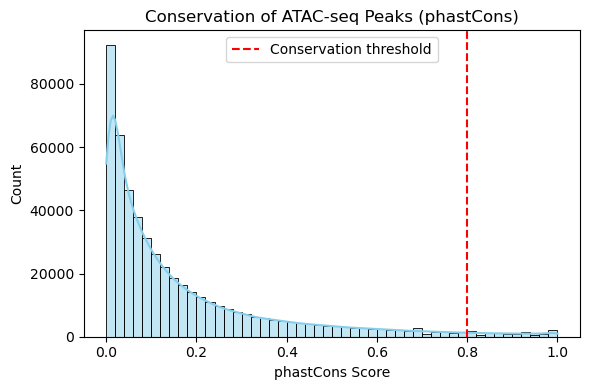

In [ ]:
# PhastCons Conservation Score Distribution of ATAC-seq Peaks
phast_scores = atac["mm10.60way.phastCons_scores"].dropna()

plt.figure(figsize=(6, 4))
sns.histplot(phast_scores, bins=50, kde=True, color='skyblue')
plt.axvline(0.8, color='red', linestyle='--', label='Conservation threshold')
plt.xlabel('phastCons Score')
plt.title('Conservation of ATAC-seq Peaks (phastCons)')
plt.legend()
plt.tight_layout()
plt.show()


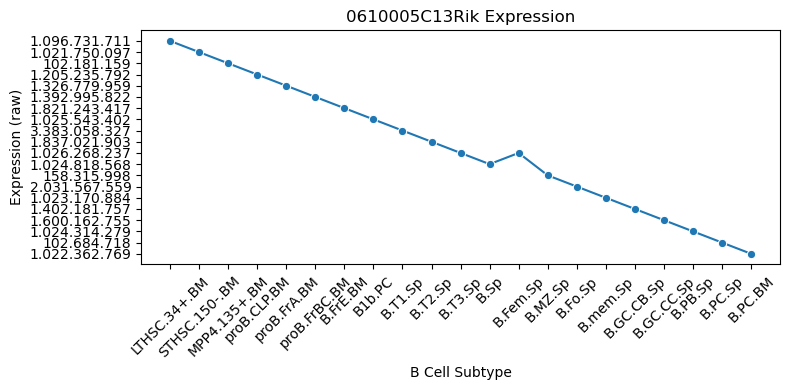

In [ ]:
#Expressionlevel of gene 0610005C13Rik over the diffrent cell types
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rna = pd.read_csv("data/RNA_Bcells.csv", index_col=0)
selected_columns = rna.columns[1:]

gene_name = rna.index[0]
expr = rna.loc[gene_name, selected_columns]

plt.figure(figsize=(8, 4))
sns.lineplot(x=selected_columns, y=expr.values, marker="o")
plt.title(f"{gene_name} Expression")
plt.xlabel("B Cell Subtype")
plt.ylabel("Expression (raw)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 



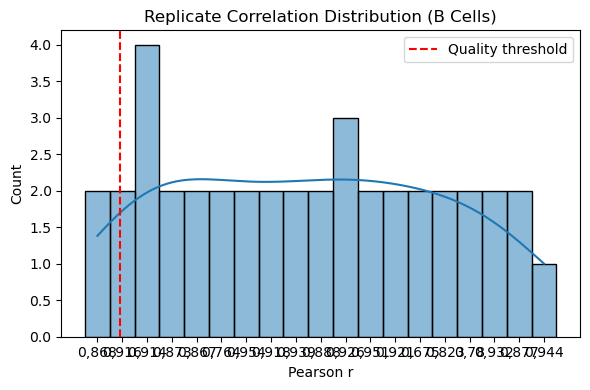

In [ ]:
#Replicate Correlation Distribution 
qc = pd.read_csv("data/ATAC_QC_Bcells.csv")
plt.figure(figsize=(6, 4))
sns.histplot(qc["Replicate.cor"], bins=20, kde=True)
plt.axvline(0.9, color="red", linestyle="--", label="Quality threshold")
plt.title("Replicate Correlation Distribution (B Cells)")
plt.xlabel("Pearson r")
plt.legend()
plt.tight_layout()
plt.show()


/opt/miniconda3/envs/envBCells1/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


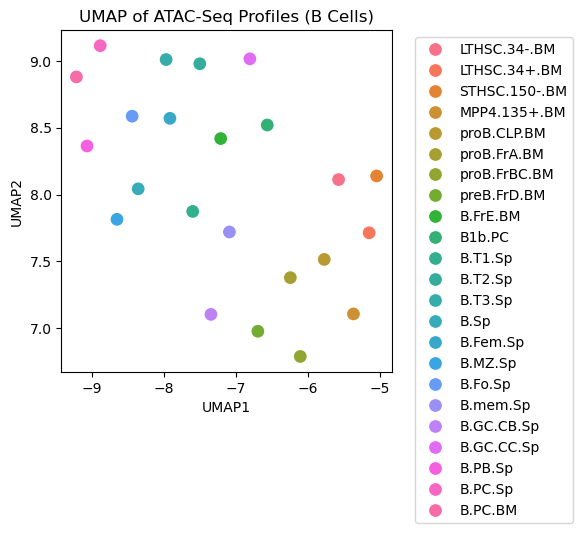

In [28]:
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
ATAC = pd.read_csv("data/ATAC_Bcells.csv")

# Select the cell columns (columns 9 to 31; Python is zero-indexed, so columns 8 to 30)
cell_columns = ATAC.columns[8:31]

# Peak matrix: rows = peaks, columns = cells
signal = ATAC[cell_columns]

# Convert to numpy array
signal_values = signal.values

# Clean NaN and infinite values
signal_clean = np.nan_to_num(signal_values, nan=0.0, posinf=1e10, neginf=-1e10)

# Standardize the data
signal_scaled = StandardScaler().fit_transform(signal_clean)

# UMAP (transpose so cells are rows)
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(signal_scaled.T)

# Create a DataFrame with UMAP results and cell names
umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
umap_df["Sample"] = cell_columns

# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="Sample", s=100)
plt.title("UMAP of ATAC-Seq Profiles (B Cells)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
